In [4]:
# import zipfile
# with zipfile.ZipFile("cats_and_dogs_filtered.zip","r") as zip_ref:
#     zip_ref.extractall()

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

## getting paths for the validation part and training part

In [6]:
import os

In [7]:
base = 'cats_and_dogs_filtered/'

train_path = os.path.join(base, 'train')
valid_path = os.path.join(base, 'validation')

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_generator = ImageDataGenerator(rescale=1/255)
test_data_generator = ImageDataGenerator(rescale=1/255)

train_gen = train_data_generator.flow_from_directory(train_path, target_size=(150,150), class_mode='binary', batch_size=20 ) ## steps_per_epoch=100
valid_gen = test_data_generator.flow_from_directory(valid_path, target_size=(150,150), class_mode='binary', batch_size=10)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), input_shape=(150, 150, 3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [11]:
history = model.fit_generator(
    train_gen, validation_data=valid_gen, epochs=10, 
    steps_per_epoch=100,
    validation_steps=50
)

Epoch 1/10


C:\Users\rohit\anaconda3\envs\cv\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 15s 64ms/step - loss: 0.7130 - acc: 0.5244 - val_loss: 0.6918 - val_acc: 0.5680
Epoch 2/10
100/100 [==============================] - 3s 33ms/step - loss: 0.6920 - acc: 0.5097 - val_loss: 0.6904 - val_acc: 0.5320
Epoch 3/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6777 - acc: 0.5518 - val_loss: 0.6714 - val_acc: 0.5740
Epoch 4/10
100/100 [==============================] - 3s 32ms/step - loss: 0.6524 - acc: 0.5809 - val_loss: 0.6420 - val_acc: 0.6340
Epoch 5/10
100/100 [==============================] - 3s 32ms/step - loss: 0.6359 - acc: 0.6138 - val_loss: 0.6456 - val_acc: 0.6020
Epoch 6/10
100/100 [==============================] - 3s 31ms/step - loss: 0.5939 - acc: 0.6641 - val_loss: 0.5717 - val_acc: 0.7020
Epoch 7/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6506 - acc: 0.6419 - val_loss: 0.6053 - val_acc: 0.6860
Epoch 8/10
100/100 [==============================] - 3s 31ms/step - loss: 0.57

cat


<ipython-input-12-ee1415abb014>:54: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


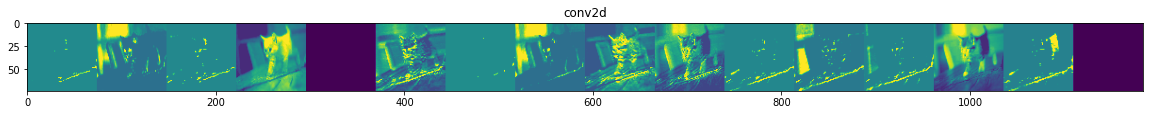

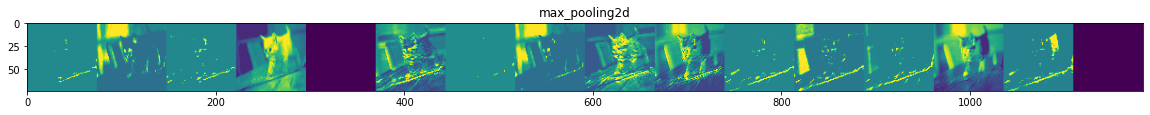

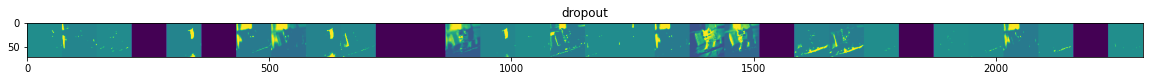

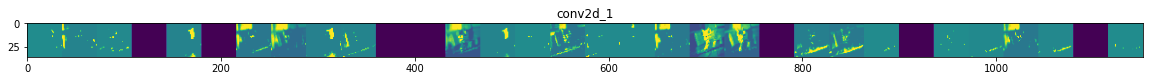

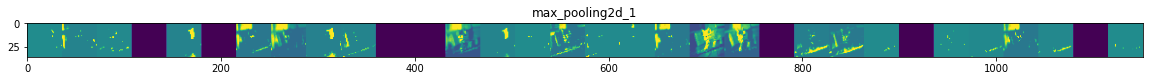

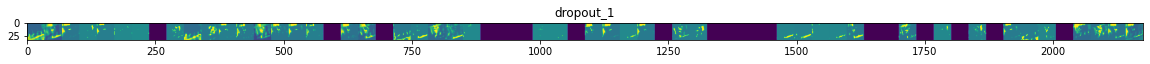

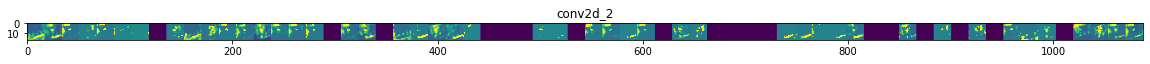

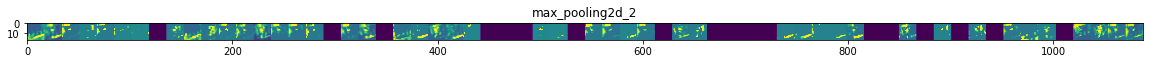

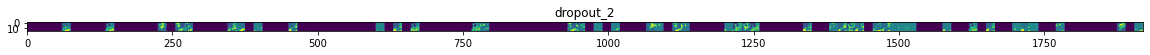

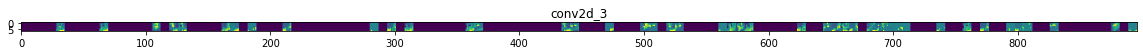

In [12]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
img_path = 'cat.jpg'
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
pred = model.predict(x)
if(pred<1): print('cat')
else: print('dog')
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [13]:
Model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), input_shape=(150, 150, 3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
from keras.optimizers import RMSprop

Model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [15]:
hst2 = Model.fit(train_gen, epochs=10, steps_per_epoch=100, validation_data = valid_gen, validation_steps=100)

Epoch 1/10
100/100 [==============================] - 5s 39ms/step - loss: 1.8768 - acc: 0.4888 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 4s 38ms/step - loss: 0.6973 - acc: 0.5499 - val_loss: 0.6869 - val_acc: 0.5560
Epoch 3/10
100/100 [==============================] - 4s 38ms/step - loss: 0.6767 - acc: 0.5729 - val_loss: 0.6659 - val_acc: 0.6670
Epoch 4/10
100/100 [==============================] - 4s 38ms/step - loss: 0.6368 - acc: 0.6586 - val_loss: 0.6578 - val_acc: 0.5610
Epoch 5/10
100/100 [==============================] - 4s 38ms/step - loss: 0.5905 - acc: 0.6896 - val_loss: 0.6033 - val_acc: 0.6640
Epoch 6/10
100/100 [==============================] - 4s 41ms/step - loss: 0.5446 - acc: 0.7221 - val_loss: 0.5916 - val_acc: 0.6950
Epoch 7/10
100/100 [==============================] - 4s 39ms/step - loss: 0.5357 - acc: 0.7195 - val_loss: 0.5753 - val_acc: 0.6920
Epoch 8/10
100/100 [==============================] - 4s 37ms/step - 

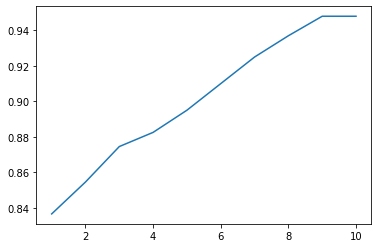

In [23]:
plt.plot(range(1, 1+len(hst2.history['acc'])), hst2.history['acc'], label='acc' )
plt.show()

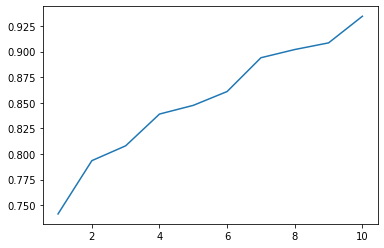

In [24]:
plt.plot(range(1, 1+len(history.history['acc'])), history.history['acc'], label='acc' )
plt.show()

In [34]:
aug_train_gen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  fill_mode='nearest')

In [35]:
aug_valid_gen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  fill_mode='nearest',
                                  zoom_range=0.2)

In [46]:
aug_train = aug_train_gen.flow_from_directory(train_path, target_size=(150, 150), batch_size=20, class_mode='binary')
aug_valid = aug_valid_gen.flow_from_directory(valid_path, target_size=(150, 150), batch_size=10, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [47]:
augmodel = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), input_shape=(150, 150, 3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [52]:
from keras.optimizers import RMSprop
augmodel.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [70]:
hist1 = augmodel.fit(aug_train,
            epochs=10,
            steps_per_epoch=100,
            validation_data = aug_valid,
            validation_steps=100)


Epoch 1/10
100/100 [==============================] - 16s 158ms/step - loss: 0.4523 - acc: 0.8025 - val_loss: 0.5250 - val_acc: 0.73900s - loss: 0.4546 - ac
Epoch 2/10
100/100 [==============================] - 15s 153ms/step - loss: 0.4600 - acc: 0.7860 - val_loss: 0.5344 - val_acc: 0.7640
Epoch 3/10
100/100 [==============================] - 16s 161ms/step - loss: 0.4572 - acc: 0.7880 - val_loss: 0.5463 - val_acc: 0.7250
Epoch 4/10
100/100 [==============================] - 17s 168ms/step - loss: 0.4578 - acc: 0.7855 - val_loss: 0.5054 - val_acc: 0.7420
Epoch 5/10
100/100 [==============================] - 16s 162ms/step - loss: 0.4903 - acc: 0.7850 - val_loss: 0.5316 - val_acc: 0.7350
Epoch 6/10
100/100 [==============================] - 16s 157ms/step - loss: 0.4517 - acc: 0.7880 - val_loss: 0.5501 - val_acc: 0.7360
Epoch 7/10
100/100 [==============================] - 15s 152ms/step - loss: 0.4516 - acc: 0.7895 - val_loss: 0.5602 - val_acc: 0.7180
Epoch 8/10
100/100 [=============

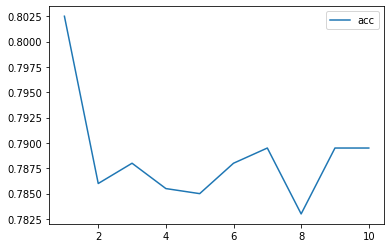

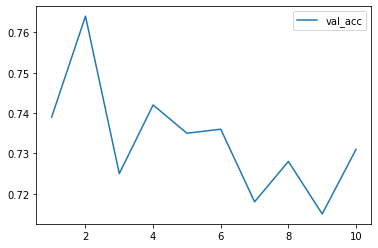

In [71]:
plt.plot(range(1, 1+len(hist1.history['acc'])), hist1.history['acc'], label='acc')

plt.legend()
plt.show()

plt.plot(range(1, 1+len(hist1.history['val_acc'])), hist1.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [79]:
weights=[]

from keras import layers

for layer in augmodel.layers:
    weights.append(layer.get_weights())

In [99]:
print(weights[0])

[array([[[[-0.13659813, -0.06871463,  0.22617523,  0.08916309,
          -0.06911671,  0.15597893, -0.02269785, -0.04676697,
          -0.04001614, -0.1880174 ,  0.02011952, -0.07573006,
           0.0160322 , -0.01584911, -0.1820808 ,  0.01248439],
         [-0.25798535,  0.04948422,  0.03134973, -0.18757342,
          -0.10575782, -0.15388559, -0.19853151,  0.05461258,
           0.11693057, -0.10493013,  0.02808504,  0.01270027,
           0.16801883,  0.04602822,  0.04122329,  0.02771673],
         [-0.2252495 , -0.24200916,  0.08812866, -0.11593901,
           0.02729459,  0.02410834, -0.20247456, -0.01051341,
          -0.05942911, -0.03583538, -0.05020005, -0.14534962,
          -0.13054015, -0.08634613, -0.10192161, -0.12271255]],

        [[ 0.23494154, -0.22044285, -0.00272821, -0.01809559,
           0.10539649,  0.1560964 , -0.12667303,  0.1817114 ,
          -0.13314533,  0.06334053,  0.18004426, -0.00867632,
           0.14142023,  0.06320169,  0.22752605, -0.04459909],
 

In [81]:
type(weights)

list

### plotting graph 

Text(0.5, 1.0, 'Training and validation loss')

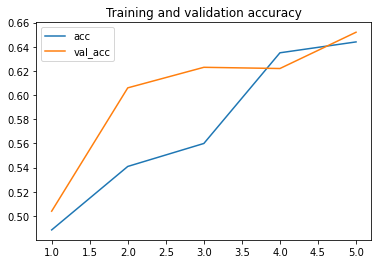

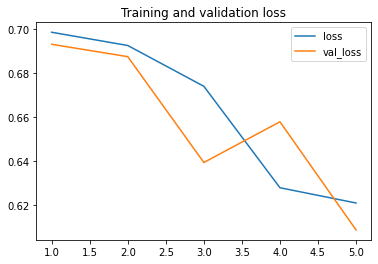

In [57]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1, 1+len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc , label='acc')
plt.plot  ( epochs, val_acc , label='val_acc')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss , label='loss')
plt.plot  ( epochs, val_loss , label='val_loss')
plt.legend()
plt.title ('Training and validation loss'   )

# Using ImageDataGenerator with data augumentation

In [25]:
train_aug_data_gen = ImageDataGenerator(rescale=1./255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2, 
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest'
                                       )

In [26]:
valid_aug_data_gen = ImageDataGenerator(rescale=1.0/255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest'
                                       ) ## here magic box is created and we need to plug this to dir

In [61]:
Model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), input_shape=(300, 300, 3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [65]:
from keras.optimizers import RMSprop

opt = RMSprop(lr=0.0001)

Model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [66]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')>0.965):
            print('\nacc achieved 86.5%')
            self.model.stop_training=True
            
callback = myCallback()

In [67]:
Model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 71, 71, 32)       

In [60]:
train_gen = train_aug_data_gen.flow_from_directory(train_path, target_size=(300,300),class_mode='binary', batch_size=20)
valid_gen = valid_aug_data_gen.flow_from_directory(valid_path, target_size=(300,300), class_mode='binary', batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [75]:
from tensorflow import keras

history = Model.fit_generator(train_gen, 
                              epochs=10, 
                              validation_data = valid_gen, 
                              steps_per_epoch=100, 
                              validation_steps=100 
                             )


Epoch 1/10


NotFoundError:  No algorithm worked!
	 [[node gradient_tape/sequential_7/conv2d_25/Conv2D/Conv2DBackpropFilter (defined at <ipython-input-72-29c936647941>:1) ]] [Op:__inference_train_function_9705]

Function call stack:
train_function


In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(acc))
plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc,label='val_acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.legend()
plt.show()

In [ ]:
val_acc[-1]

In [ ]:
acc[-1]

In [ ]:
maxi=0
for i in val_acc:
    if(maxi<i): maxi=i

In [ ]:
maxi

In [ ]:
Model2 = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), input_shape=(300, 300, 3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
Model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
Model2.summary()

In [ ]:

history = Model2.fit_generator(
    train_gen, 
    validation_data=valid_gen, 
    epochs=5, 
    steps_per_epoch=100,
    validation_steps=50
)

In [ ]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

In [ ]:
epochs = range(1, 1+len(acc2))

plt.plot( epochs,acc2, label='acc')
plt.plot(epochs,val_acc2,  label='val_acc')
plt.legend()
plt.figure()
plt.plot(epochs,loss2, label='loss')
plt.plot(epochs,val_loss2 , label='val_loss')
plt.legend()
plt.show()

In [ ]:
val_acc2[-1]

In [ ]:
epochs = range(1, 1+len(acc2))

plt.plot( epochs,acc2, label='acc')
plt.plot(epochs,val_acc2,  label='val_acc')
plt.legend()
plt.figure()
plt.plot(epochs,loss2, label='loss')
plt.plot(epochs,val_loss2 , label='val_loss')
plt.legend()
plt.show()